<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1">Project description</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2">Data preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.1-Loading-data" data-toc-modified-id="1.1-Loading-data-2.0.1">1.1 Loading data</a></span></li><li><span><a href="#1.2-Checking-that-recovery-is-calculated-correctly" data-toc-modified-id="1.2-Checking-that-recovery-is-calculated-correctly-2.0.2">1.2 Checking that recovery is calculated correctly</a></span></li><li><span><a href="#1.3-Analyze-the-features-not-available-in-the-test-set.-What-are-these-parameters?-What-is-their-type?" data-toc-modified-id="1.3-Analyze-the-features-not-available-in-the-test-set.-What-are-these-parameters?-What-is-their-type?-2.0.3">1.3 Analyze the features not available in the test set. What are these parameters? What is their type?</a></span></li><li><span><a href="#1.4-Perform-data-preprocessing" data-toc-modified-id="1.4-Perform-data-preprocessing-2.0.4">1.4 Perform data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.0.4.1">Missing values</a></span></li><li><span><a href="#Duplicates-detection" data-toc-modified-id="Duplicates-detection-2.0.4.2">Duplicates detection</a></span></li></ul></li><li><span><a href="#1.5-Data-preparation-summary" data-toc-modified-id="1.5-Data-preparation-summary-2.0.5">1.5 Data preparation summary</a></span></li></ul></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-3">Data analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#2.1-Metal-concentration-change-at-each-purification-stage" data-toc-modified-id="2.1-Metal-concentration-change-at-each-purification-stage-3.0.1">2.1 Metal concentration change at each purification stage</a></span></li><li><span><a href="#2.2-Feed-particle-size-distribution-comparison" data-toc-modified-id="2.2-Feed-particle-size-distribution-comparison-3.0.2">2.2 Feed particle size distribution comparison</a></span></li><li><span><a href="#2.3-Total-concentration-of-all-metals-at-different-stages" data-toc-modified-id="2.3-Total-concentration-of-all-metals-at-different-stages-3.0.3">2.3 Total concentration of all metals at different stages</a></span></li><li><span><a href="#2.4-Data-analysis-summary" data-toc-modified-id="2.4-Data-analysis-summary-3.0.4">2.4 Data analysis summary</a></span></li></ul></li></ul></li><li><span><a href="#Building-machine-learning-models" data-toc-modified-id="Building-machine-learning-models-4">Building machine learning models</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Linear-model" data-toc-modified-id="Linear-model-4.0.1">Linear model</a></span><ul class="toc-item"><li><span><a href="#Cross-validation-for-linear-model" data-toc-modified-id="Cross-validation-for-linear-model-4.0.1.1">Cross-validation for linear model</a></span></li></ul></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-4.0.2">Random Forest Regressor</a></span></li><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-4.0.3">Decision Tree Regressor</a></span></li><li><span><a href="#Comparing-model-performance-using-dummy-regressor-and-average" data-toc-modified-id="Comparing-model-performance-using-dummy-regressor-and-average-4.0.4">Comparing model performance using dummy regressor and average</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

# Project description

This project is brought the Zyfra Group, company that serves to improve the efficiency and safety of the mining, oil & gas, chemical and engineering industries. In this project we will work with gold recovery data and look into gold mining technological process.<br>

<b>Gold mining process</b><br> 
Mined ore undergoes primary processing to get the ore mixture or rougher feed, which is the raw material for flotation (also known as the rougher process). After flotation, the material is sent to two-stage purification.<br>
<b> 1. Flotation</b><br>
Gold ore mixture is fed into the float banks to obtain rougher Au concentrate and rougher tails (product residues with a low concentration of valuable metals).
The stability of this process is affected by the volatile and non-optimal physicochemical state of the flotation pulp (a mixture of solid particles and liquid).<br>
<b> 2. Purification</b><br>
The rougher concentrate undergoes two stages of purification. After purification, we have the final concentrate and new tails.<br>

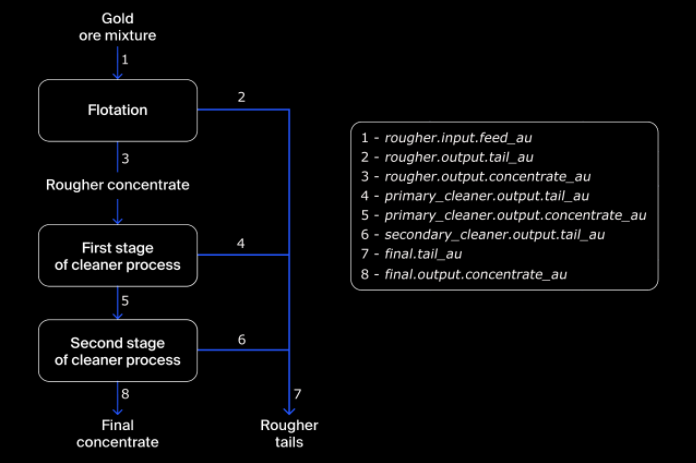

In [1]:
from IPython.display import Image
Image("gold_recovery.png")

<b>Data description</b>

<b>Technological process:</b><br>
<i>Rougher feed</i> — raw material<br>
<i>Rougher additions (or reagent additions)</i> — flotation reagents: Xanthate (promoter or flotation activator), Sulphate (sodium sulphide for this particular process), Depressant (sodium silicate)<br>
<i>Rougher process</i> — flotation<br>
<i>Rougher tails</i> — product residues<br>
<i>Float banks</i> — flotation unit<br>
<i>Cleaner process</i> — purification<br>
<i>Rougher Au</i> — rougher gold concentrate<br>
<i>Final Au</i> — final gold concentrate<br>

<b>Parameters of stages:</b><br>
<i>air amount</i> — volume of air<br>
<i>fluid levels</i><br>
<i>feed size</i> — feed particle size<br>
<i>feed rate</i><br> 


<b>Task statement</b><br> Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry. The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification. The model will help to optimize the production and eliminate unprofitable parameters.<br>

<b>Clarifications</b><br>
Data is indexed with the date and time of acquisition (date feature). Parameters that are close to each other in terms of time are often similar. Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The set set also doesn't contain targets.<br>
The source dataset contains the training and test sets with all the features. The raw data in the state as it was downloaded from the warehouse.<br>

<b>Project instructions:</b><br>
1. Prepare data<br>
2. Perform data analysis<br>
3. Develop and train a model<br>

# Data preparation

In [2]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### 1.1 Loading data

In [3]:
gold_train = pd.read_csv('gold_recovery_train.csv')
gold_test = pd.read_csv('gold_recovery_test.csv')
gold_full = pd.read_csv('gold_recovery_full.csv')

### 1.2 Checking that recovery is calculated correctly

In [4]:
C = gold_train['rougher.output.concentrate_au']
F = gold_train['rougher.input.feed_au']
T = gold_train['rougher.output.tail_au']
gold_train['rougher.output.recovery.check'] = 100 * (C *(F-T))/(F*(C-T))
abs((gold_train['rougher.output.recovery.check'] - gold_train['rougher.output.recovery']).mean())

1.4592124278302785e-16

In [5]:
gold_train[['rougher.output.recovery','rougher.output.recovery.check']].sample(5)

,rougher.output.recovery,rougher.output.recovery.check
12968,89.162264,89.162264
983,90.714894,90.714894
3038,86.742300,86.742300
5859,NaN,NaN
5227,88.924975,88.924975


We checked if recovery was calculated correctly. The MEA between our calculations and feature values is very low and from what we can observe above calculated and feature values seem to be the same. Perhaps, the very small difference is due to precision and data types used.

### 1.3 Analyze the features not available in the test set. What are these parameters? What is their type?

In [6]:
gold_train.shape

(16860, 88)

In [7]:
gold_test.shape

(5856, 53)

In [8]:
gold_full.shape

(22716, 87)

There are less features in the test data than in the train dataset. Let's look at what features are present in both sets.

In [9]:
# The same columns both in train and test
same_columns = list(set(gold_train.columns).intersection(set(gold_test.columns)))
sorted(same_columns)

['date',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

In [10]:
# Columns not in test dataset
diff_columns = list(set(gold_train.columns) - (set(gold_test.columns)))
sorted(diff_columns)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery.check',
 'rougher.output.tail_ag',
 'rougher.ou

The 35 columns above are missing in the test dataset. Maybe some values were not immediately available when the data was obtained. The parameter type is output and calculation, this data is similar to target variable, so we need to exclude it from the train set for building a model. 

In [11]:
gold_train[same_columns].dtypes.value_counts()

float64    52
object      1
dtype: int64

We can see that 'Date' is saved as a string and some of the values are missing in some columns. There are no categorical data in the data set, except for 'Date' column, all other features are numeric and have float type.

### 1.4 Perform data preprocessing

#### Missing values

We will only look into data available in both train and test sets, filtering out missing columns.

In [12]:
(gold_train[same_columns].isnull().sum()/gold_train.shape[0]).sort_values(ascending = False)

rougher.input.floatbank11_xanthate            0.112930
primary_cleaner.input.sulfate                 0.077521
primary_cleaner.input.depressant              0.074852
rougher.input.floatbank10_sulfate             0.061922
primary_cleaner.input.xanthate                0.058422
rougher.input.floatbank11_sulfate             0.036951
rougher.state.floatbank10_e_air               0.035765
rougher.input.feed_rate                       0.030427
rougher.input.feed_size                       0.024733
secondary_cleaner.state.floatbank2_a_air      0.021530
rougher.input.floatbank10_xanthate            0.020522
rougher.input.feed_sol                        0.017319
rougher.input.feed_pb                         0.013523
secondary_cleaner.state.floatbank2_b_air      0.009193
secondary_cleaner.state.floatbank4_a_air      0.007651
secondary_cleaner.state.floatbank4_a_level    0.006702
secondary_cleaner.state.floatbank3_a_level    0.006702
secondary_cleaner.state.floatbank2_b_level    0.006643
secondary_

Values are missing in all the stages of the technological process. At most, 11% of data is missing.<br>
Because we know that parameters that are next to each other in terms of time are ofter similar (as per project description) we can fill in missing values 

In [13]:
# method='ffill' - Forward Fill of missing data.
# Train
gold_train.loc[:,same_columns] = gold_train.loc[:,same_columns].fillna(method='ffill')
# Test
gold_test.loc[:,same_columns] = gold_test.loc[:,same_columns].fillna(method='ffill')

In [14]:
# Changing type of the Date and sorting the dataset in cronological order
gold_train['date'] = pd.to_datetime(gold_train.date)
gold_train.sort_values('date', inplace=True)
gold_train.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery.check
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.37500,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.89366,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.62923

In [15]:
gold_train.tail(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery.check
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,98.880538,7.984164,6.5,1.241969,7.490444,12.012378,6.942972,30.770892,22.714656,6.253145,3.557121,2.800648,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,44084.735708,2507.572494,2507.723361,1.117935,6.048130,3.902537,544.731687,123.742430,39.713906,4.362781,6.210119,9.297709,6.209517,9.297194,11.658799,10.655377,29.052742,17.834772,89.858126,3.902494,0.625609,19.423740,0.567130,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,0.0,0.0,0.0,0.0,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126
16859,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,95.248427,8.078957,6.5,1

In [16]:
# Performing the same step for the test and full datasets
gold_test['date'] = pd.to_datetime(gold_test.date)
gold_test.sort_values('date', inplace=True)
gold_full['date'] = pd.to_datetime(gold_full['date'])
gold_full.sort_values('date', inplace=True)

Now we have all the row sorted from earliest data (year 2016) to the latest date (year 2018).

#### Duplicates detection

In [17]:
gold_train.duplicated().sum()

0

In [18]:
gold_test.duplicated().sum()

0

In [19]:
gold_full.duplicated().sum()

0

No duplicated values in three datasets.

### 1.5 Data preparation summary

- We discovered that train and test sets do not have the same size. The test set is 35 features short.<br>
- 'Date' column was converted to correct type<br>
- Values missing both in train and test datasets were replaced with fill forward method. e.g. using available data from preceding records<br>
- There are no duplicated values<br>

# Data analysis

### 2.1 Metal concentration change at each purification stage

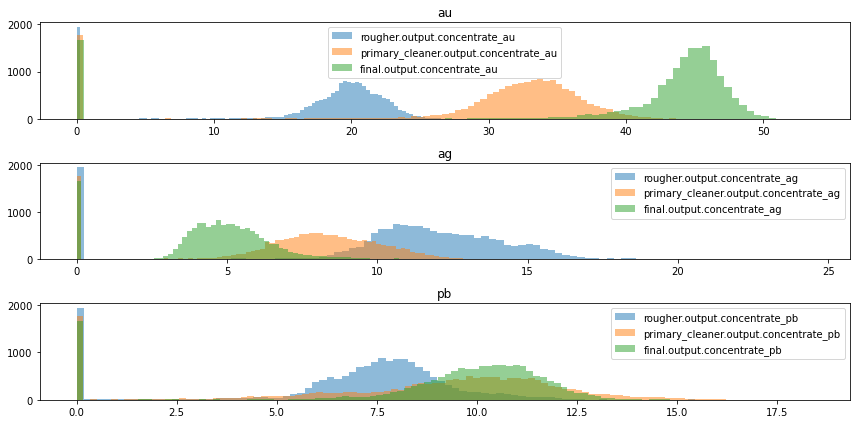

In [20]:
metals = ['au', 'ag', 'pb']
columns = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

fig = plt.figure(figsize=(12,6))
for i,metal in enumerate(metals):
    for col in columns:
        plt.subplot(3,1,i+1) # subplot(nrows, ncols, index, **kwargs)
        plt.hist(gold_train[col+'_'+metal],bins=100,label=col+'_'+metal,alpha=.5);
    plt.title(metal)

    plt.legend()
    
plt.tight_layout()
plt.show()

Our target metal is gold and we can see that the concentration of it increases through each purification stage, with maximum concentration being in the final output concentrate. For other two metals - silver and lead - the picture is not that perfect, but these two metals are byproducts of the technological process, so the picture is very clear and everything makes sense.<br>
There are some values at around zero and we can see those spikes on the three graphs. We will deal with these outliers later.

### 2.2 Feed particle size distribution comparison

We were asked to compare feed particle size distribution for in the training set and in the test set, because if the distribution vary significantly the model evaluation will be incorrect. 

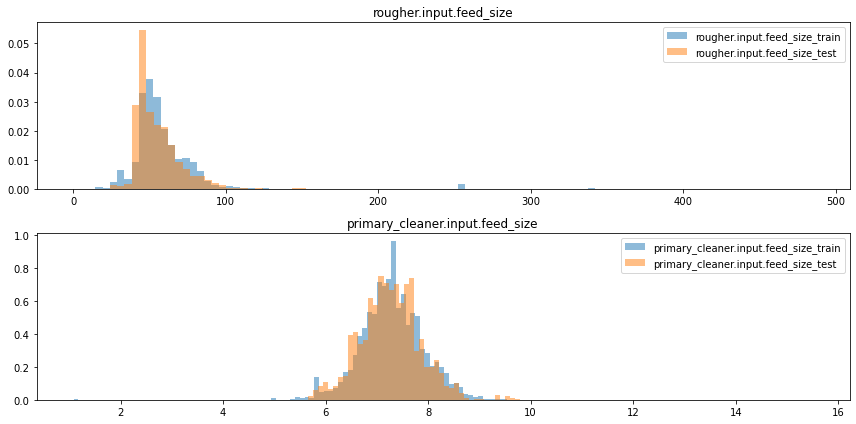

In [21]:
# feed size — feed particle sizem
columns = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

fig = plt.figure(figsize=(12,6))
for i,col in enumerate(columns):
    plt.subplot(2,1,i+1)
    plt.hist(gold_train[col],bins=100,label=col+'_train',alpha=.5, density=1);
    plt.hist(gold_test[col],bins=100,label=col+'_test',alpha=.5, density=1);
    plt.title(col)

    plt.legend()
    
plt.tight_layout()
plt.show()

We can see that the data is distributed in a similar way, so we can train a model on a train dataset and test it on a test dataset without a problem.

### 2.3 Total concentration of all metals at different stages

We saw some outliers at around zero when we were building particle size distribution histograms in the step 2.1. This data is obviously erroneous, let's replace it with the null.

In [22]:
# Train
metals = ['au', 'ag', 'pb']
columns = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

for i, metal in enumerate(metals):
    for col in columns:
        gold_train[gold_train[col+'_'+metal]<0.01] = np.nan

for col in ['final.output.recovery', 'rougher.output.recovery']:
    gold_train[gold_train[col]<0.01] = np.nan
# Drop null values in the target columns    
gold_train.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
# Replacing null values in the features using forward fill method
gold_train.loc[:, same_columns] = gold_train.loc[:, same_columns].fillna(method='ffill')

In [23]:
gold_train.loc[:, same_columns].isnull().sum()

rougher.state.floatbank10_e_air               0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_e_level             0
rougher.input.floatbank11_xanthate            0
primary_cleaner.input.depressant              0
primary_cleaner.input.sulfate                 0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_a_level      0
secondary_cleaner.state.floatbank4_a_level    0
rougher.input.feed_size                       0
primary_cleaner.state.floatbank8_b_level      0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank5_b_air      0
primary_cleaner.state.floatbank8_c_level      0
rougher.input.feed_rate                       0
secondary_cleaner.state.floatbank5_a_level    0
rougher.input.feed_ag                         0
secondary_cleaner.state.floatbank2_b_level    0
date                                          0
secondary_cleaner.state.floatbank2_b_air

As far as the test data set is concerned some output are not available in test data set, but they are available in the full data set. So we can bring this data from the full data set.

In [24]:
# Test
gold_test = gold_test.merge(gold_full[['date', 'final.output.recovery', 'rougher.output.recovery']], 
                        how='left', on='date')

for col in ['final.output.recovery', 'rougher.output.recovery']:
    gold_test[gold_test[col]<0.01] = np.nan
# Drop null values in the target columns   
gold_test.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
# Replacing null values in the features using forward fill method
gold_test.loc[:, same_columns] = gold_test.loc[:, same_columns].fillna(method='ffill')

In [25]:
gold_test.loc[:, same_columns].isnull().sum()

rougher.state.floatbank10_e_air               0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_e_level             0
rougher.input.floatbank11_xanthate            0
primary_cleaner.input.depressant              0
primary_cleaner.input.sulfate                 0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_a_level      0
secondary_cleaner.state.floatbank4_a_level    0
rougher.input.feed_size                       0
primary_cleaner.state.floatbank8_b_level      0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank5_b_air      0
primary_cleaner.state.floatbank8_c_level      0
rougher.input.feed_rate                       0
secondary_cleaner.state.floatbank5_a_level    0
rougher.input.feed_ag                         0
secondary_cleaner.state.floatbank2_b_level    0
date                                          0
secondary_cleaner.state.floatbank2_b_air

### 2.4 Data analysis summary

- We observed how concentration of metals (Au, Ag, Pb) change depending on the purification stage. The concentration of the target metal - Au - increases with the next step of recovery. Byproducts concentration - Ag and Pb - does not follow the same logic, which makes sense, because the technological process really targets gold recovery.<br>
- We checked particle size distribution of the train and test data and they turned out to be the same. Now we can build the model without doubts on correctness of model evaluation.<br>
- We observed some outliers on the concentration graphs - points with zero values. We replaced these zeros with nulls and dropped later afterwards.<br>

# Building machine learning models

### Linear model

Let's start with the linear regresson model. We have to predict two targets with the model: rougher output recovery and final output recovery. Let us create variables for targets and features of train and test data sets.

In [26]:
targets = ['rougher.output.recovery', 'final.output.recovery']
features = [col for col in same_columns if col != 'date']

In [27]:
X_train, X_test = gold_train[features].values, gold_test[features].values
y_train, y_test = gold_train[targets].values, gold_test[targets].values

Let's build linear model.

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Not that we have built and trained the model let's calculate symmetric mean absolute percent error. For that we will create a function that will take actual values and predicted values and will return sMAPE as an output.

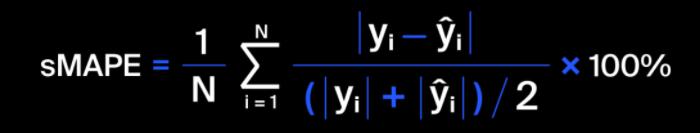

In [29]:
Image('sMAPE.png')

In [30]:
def smape(y_true, y_pred):
    return (np.abs(y_true - y_pred)/((np.abs(y_true)+np.abs(y_pred))/2)).mean()

In [31]:
pred_lr = lr.predict(X_test)
pred_lr

array([[88.96894199, 73.44466388],
       [89.20609022, 73.00479797],
       [89.34509116, 73.42095918],
       ...,
       [92.39962965, 74.41807159],
       [93.39318002, 75.68936274],
       [92.13710234, 74.90581098]])

We can see that we've got two arrays as predictions. We can calculate sMAPE for both of the targets.

In [32]:
# rougher.output.recovery
smape(y_test[:,0], pred_lr[:,0])

0.048541421279258354

In [33]:
# final.output.recovery
smape(y_test[:,1], pred_lr[:,1])

0.08138345716739644

We were also asked to compute weighted symmetric mean absolute percent error, which is one number for both arrays given specific weights, e.g. 25% of rougher and 75% of final.

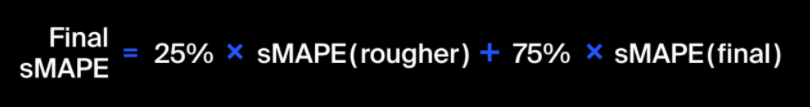

In [34]:
Image('final_sMAPE.png')

In [35]:
def smape_final(y_true,y_pred):
    smape_out_rougher = smape(y_true[:,0],y_pred[:,0])
    smape_out_final =smape(y_true[:,1],y_pred[:,1])
    return 0.25*smape_out_rougher + 0.75*smape_out_final

In [36]:
smape_final(y_test, pred_lr)

0.07317294819536192

In [37]:
smape_score = make_scorer(smape_final)

The weighted final sMAPE for both targets using linear regression model is 7.3%.<br>
We can use cross-validation to calculate sMAPE for several different folds.

#### Cross-validation for linear model

In [38]:
scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring=smape_score)
print('mean sMAPE:', scores_lr.mean())
scores_lr

mean sMAPE: 0.10083258043683171


array([0.12181293, 0.09024813, 0.09319721, 0.07810124, 0.12080339])

We can see that depending on how the data is split we can get different sMAPE values, ranging from 7.3 to 12.18, with average being 10%.

### Random Forest Regressor

Let's define a function that will perform the sMAPE score calculation for each fold of the cross-validation.

In [39]:
def cvEvaluation(model):
    smape_score = make_scorer(smape_final)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=smape_score)
    print("Mean smape: {:0.3f}. Folds: {}".format(scores.mean(), scores))

We can use grid search to find best hyper-parameters for the random forest model.

In [40]:
params = {'n_estimators': [10,20,50,100], 'max_depth': [2,5,10]}
gcv = GridSearchCV(RandomForestRegressor(),param_grid=params,scoring=smape_score, cv=5, refit=True)
gcv.fit(X_train, y_train)
best_params = gcv.best_params_

In [41]:
print(best_params)
print(gcv.best_estimator_)
print('Mean CV Score: ',gcv.cv_results_['mean_test_score'].min())

{'max_depth': 10, 'n_estimators': 20}
RandomForestRegressor(max_depth=10, n_estimators=20)
Mean CV Score:  0.08989263299971748


In [42]:
# Random Forest with best parameters
rf = RandomForestRegressor(max_depth=10, n_estimators=20)
rf.fit(X_train, X_train)

RandomForestRegressor(max_depth=10, n_estimators=20)

In [43]:
cvEvaluation(rf)

Mean smape: 0.093. Folds: [0.09487022 0.09392166 0.08359322 0.08835796 0.10497862]


Predicting targets with Random forest model for test data set.

In [44]:
smape_final(y_test,gcv.best_estimator_.predict(X_test))

0.07706667314597081

The mean sMAPE on the training set for this model using cross-validation technique is 9.2%. The sMAPE on the test set (the one that model did not see before) is 7.77%.

### Decision Tree Regressor

In [45]:
for i in [2, 3, 5,7, 10]:
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    scores_dt = cross_val_score(dtr, X_train, y_train, cv=5, scoring=smape_score,)
    print('Max Depth ' + str(i)+ ', mean sMAPE: ' + str((scores_dt.mean()).round(4)))

Max Depth 2, mean sMAPE: 0.0943
Max Depth 3, mean sMAPE: 0.0928
Max Depth 5, mean sMAPE: 0.1003
Max Depth 7, mean sMAPE: 0.104
Max Depth 10, mean sMAPE: 0.1131


In [46]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [47]:
cvEvaluation(dtr)

Mean smape: 0.094. Folds: [0.09582227 0.08398633 0.08436524 0.10187694 0.10568621]


In [48]:
smape_final(y_test,dtr.predict(X_test))

0.07616761044999083

Decision Tree Regressor model demonstrated best performance on our data, as its sMAPE values are the lowest.

### Comparing model performance using dummy regressor and average

Now that we have three potential models to choose from, we can compare their performance using dummy regressor or average value. This is a sanity check technique.

In [51]:
# sMAPE using only average of y train samples
smape_final(y_test, np.ones(y_test.shape)*y_train.mean(0))

0.07776134140377196

In [52]:
# sMAPE using dummy regressor
dm = DummyRegressor(strategy='mean')
dm.fit(X_train, y_train)
smape_final(y_test, dm.predict(X_test))

0.07776134140377196

Decision Tree Regressor's sMAPE is lower than the one for the dummy models, as such we can conclude that the model performs better than a random chance.

# Conclusion

First we check if recovery was calculated correctly and it was. Then we look at features that were not available in the test set. Thirty plus columns were unavailable in the test data set and we decided to remove these columns as well from the training set, because there was no way to get this data.<br>
We performed data preparation: filled in missing values, using forward fill method, because it was stated in the task that parameters that are next to each other are often similar. We checked for duplicated values and did not detect them. We changed data type of the 'date' column to time stamp format and sorted datasets by this feature.<br>
The best model to use for this task is the random forest regressor. This model showed the lowest sMAPE value of 7.73% on the test set.<br/>